# PFD et analyse d'une force de frottement.
## (Enseignement de spécialité première S)

- Capacité numérique : Utiliser un langage de programmation pour étudier la relation approchée entre la variation du vecteur vitesse d’un système modélisé par un point matériel entre deux instants voisins et la somme des forces appliquées sur celui-ci.

- activité support: Etude de la chute verticale d'un système avec ou sans frottement (acquisition vidéo). Enregistrement à l'aide d'une table à coussin d'air du mouvement rectiligne d'un système.

- Dans ces conditions les élèves déterminent les vitesses en différents points de la trajectoire. (remarque: il est possible de modifier le programme pour calculer les vitesses en fonction des positions.)

- Le programme permet de représenter la courbe donnant l'évolution de la vitesse en fonction du temps. Il permet de modéliser les forces de frottement. Ici seul le cas des frottements f=k*v est modélisé. 
- Il est possible de faire les autres modèles de frottements en modifiant la puissance sur la vitesse.


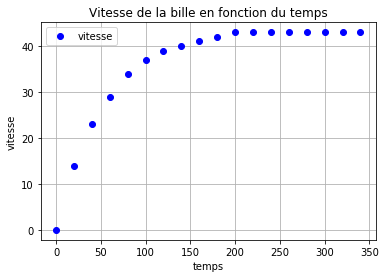

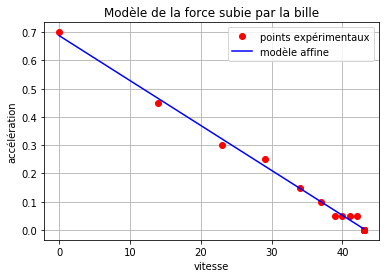

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
#On importe les bibliothèques et les modules nécessaires.

from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#définition d'une fonction permettant de calculer la dérivée à un instant donné
# les conditions initiales sont imposées par défaut.
def derivation(position1=0,position2=1,instant1=0,instant2=1):
    #initialisation d'une variable globale v 
    global derivee
    derivee=0
    derivee=(position2-position1)/(instant2-instant1)
    

    
# programme principal
#Initialisation des données vitesse.
vitesse=np.array([0,14,23,29,34,37,39,40,41,42,43,43,43,43,43,43,43,43]) 

#initialisation des listes qui recevront les instants et l'accélération.
acceleration=[]
temps=[]

# repérage temporel des instants dans la liste temps[], à partir de la fréquence d'aquisition et du nombre total de points.
for i in range(len(vitesse)): 
    t=20*i
    temps.append(t)

#calcul des accélération en utilisant la fonction dérivation utilisation de la boucle for.
for i in range(len(vitesse)-1):
    derivation(vitesse[i],vitesse[i+1],temps[i],temps[i+1])
    acceleration.append(derivee)
    
    
#modélisation de la force de frottement à partir de l'interprétation du PFD.
v0=vitesse[:-1]
# regression lineaire à partir de la fonction prédéfinie polyfit. Les arguments sont la vitesse, l'accélération,
# et la puissance envisagée pour le modèle ici par défaut elle est prise égale à 1.
mod=np.polyfit(v0,acceleration,1)
model=mod[0]*v0+mod[1]
#(mod[0] coefficient directeur et mod[1] ordonnée à l'origine.
#représentation graphique pour interprétation avec le PFD.
plt.figure()
plt.plot(temps,vitesse,'bo', label='vitesse')
plt.legend()
plt.grid()
plt.xlabel("temps")
plt.ylabel("vitesse")
plt.title("Vitesse de la bille en fonction du temps")
plt.show()
#représentation de la modélisation de la force de frottement
plt.figure()
plt.plot(v0,acceleration,'ro',label='points expérimentaux')
plt.plot(v0,model,'b-',label='modèle affine')
plt.legend()
plt.grid()
plt.xlabel("vitesse")
plt.ylabel("accélération")
plt.title("Modèle de la force subie par la bille")
plt.show()